# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pylab as plt
from itertools import groupby

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice():
    lst = [] 
    for r in range(10):
        roll = (random.randint(1,6))
        lst.append(roll)
    return lst

In [3]:
dice = roll_dice()
dice

[3, 4, 2, 1, 2, 4, 3, 6, 5, 4]

In [4]:
df = pd.DataFrame(dice, columns=['random_roll'])
df.head()

,random_roll
0,3
1,4
2,2
3,1
4,2


#### 2.- Plot the results sorted by value.

In [5]:
df = df.sort_values('random_roll')
df

,random_roll
3,1
2,2
4,2
0,3
6,3
1,4
5,4
9,4
8,5
7,6


<AxesSubplot:>

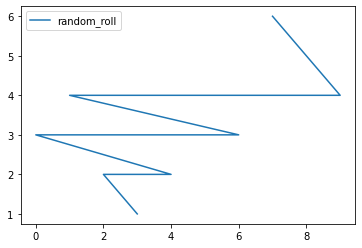

In [13]:
df.plot()

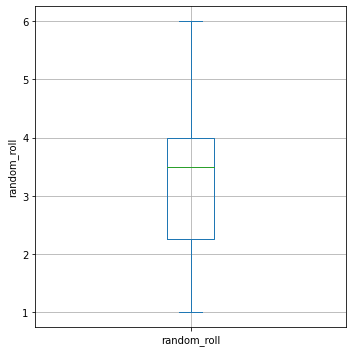

In [14]:
# your code here
data = df['random_roll']
ax = data.plot.box(figsize=(5, 5))
ax.set_ylabel('random_roll')
#ax.boxplot(data, whis=[0, 100])
plt.tight_layout()
plt.grid()
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [15]:
freq_dice = df.value_counts(sort=False)
freq_dice

random_roll
1              1
2              2
3              2
4              3
5              1
6              1
dtype: int64

<AxesSubplot:xlabel='random_roll'>

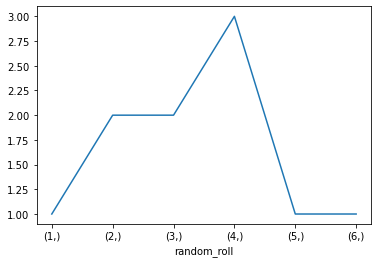

In [16]:
freq_dice.plot()

In [ ]:
# Se identifica de manera mucho más sencilla la frecuencia de cada una de las opciones de la cara del dado en el histrograma

In [23]:
# Frequency table (equal-size bins)

binnedroll = pd.cut(df['random_roll'], 6)

binnedroll.head()

3    (0.995, 1.833]
2    (1.833, 2.667]
4    (1.833, 2.667]
0      (2.667, 3.5]
6      (2.667, 3.5]
Name: random_roll, dtype: category
Categories (6, interval[float64, right]): [(0.995, 1.833] < (1.833, 2.667] < (2.667, 3.5] < (3.5, 4.333] < (4.333, 5.167] < (5.167, 6.0]]

In [24]:
binnedroll.value_counts()

(3.5, 4.333]      3
(1.833, 2.667]    2
(2.667, 3.5]      2
(0.995, 1.833]    1
(4.333, 5.167]    1
(5.167, 6.0]      1
Name: random_roll, dtype: int64

In [25]:
binnedroll.name = 'binnedRoll'
df = pd.concat([df, binnedroll], axis=1)
df = df.sort_values(by='random_roll')
df

,random_roll,binnedRoll
3,1,"(0.995, 1.833]"
2,2,"(1.833, 2.667]"
4,2,"(1.833, 2.667]"
0,3,"(2.667, 3.5]"
6,3,"(2.667, 3.5]"
1,4,"(3.5, 4.333]"
5,4,"(3.5, 4.333]"
9,4,"(3.5, 4.333]"
8,5,"(4.333, 5.167]"
7,6,"(5.167, 6.0]"


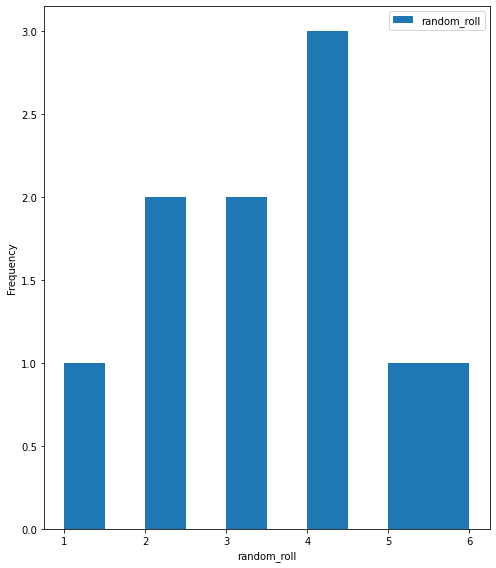

In [26]:
data = df
ax = data.plot.hist(figsize=(7, 8))
ax.set_xlabel('random_roll')
plt.tight_layout()
plt.show()

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [17]:
# your code here
def calc_main(r):
    h = r.sum() / r.count()
    return h

In [18]:
calc_main(df['random_roll'])

3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [19]:
# Volvemos a calcular la distribución de frecuencias
freq_dice = df.value_counts(sort=False)
freq_dice

random_roll
1              1
2              2
3              2
4              3
5              1
6              1
dtype: int64

In [20]:
# Aplicamos la función creada anteriormente para calcular la media
calc_main(freq_dice)

1.6666666666666667

In [27]:
# Otra manera de calcular una tabla de frecuencias convertida en DataFrame
freq_distr = pd.DataFrame([len(list(group)) for key, group in groupby(sorted(df['random_roll']))], columns=['Freq_distr'])
freq_distr

,Freq_distr
0,1
1,2
2,2
3,3
4,1
5,1


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [28]:
# your code here
def median(lst):
    n = len(lst)
    s = sorted(lst)
    if n % 2 != 0:
        return s[int(n/2)]
    else:
        return (s[int(n/2)] + s[int(n/2)-1])/2

In [31]:
median(df['random_roll'])

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [79]:
samples = sorted([28, 12, 8, 27, 16, 31, 14, 13, 19, 1, 1, 22, 13,50])

In [88]:
def quantiles(lst):
    n = len(lst)
    s = sorted(lst)
    indices=[]
    subindices=[]
    if n % 2 != 0:
        indices.append(int(n / 2))
        Q2 = s[int(n/2)]
        subindices.append(int(len(lst[:indices[0]]) / 2)-1)
        subindices.append(int(len(lst[:indices[0]]) / 2))
        Q1 = (s[subindices[0]] + s[subindices[1]]) / 2
        s3 = s[subindices[-1] + 1:]
        Q3 = (s3[subindices[0]] + s3[subindices[1]]) / 2
    else:
        indices.append(int(n / 2) - 1)
        indices.append(int(n / 2))
        Q2 = (s[indices[0]] + s[indices[1]])/2
        subindices.append(int(len(lst[:indices[0]]) / 2)-1)
        subindices.append(int(len(lst[:indices[0]]) / 2))
        Q1 = (s[subindices[0]] + s[subindices[1]]) / 2
        s3 = s[indices[-1] + 1:]
        Q3 = (s3[subindices[0]] + s3[subindices[1]]) / 2
    return (f'Q1={Q1}, Q2={Q2}, Q3={Q3}')

In [89]:
quantiles(samples)

'Q1=10.0, Q2=15.0, Q3=27.5'

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [32]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [33]:
dice_sort = dice.sort_values('value')
dice_sort

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


In [37]:
dice_sort.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

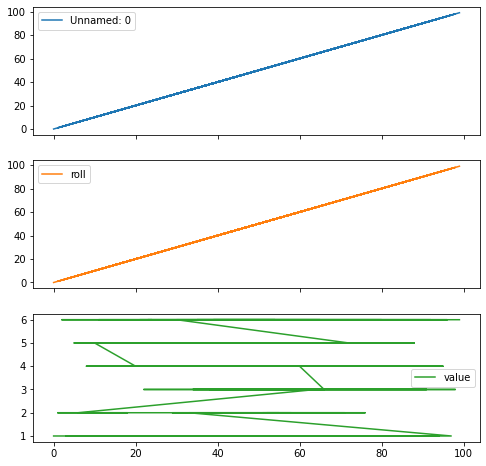

In [36]:
dice_sort.plot(subplots=True, figsize=(8,8))

In [ ]:
# Los resultados tienden a homogeneizarse en su frecuencia, aunque es difícil de ver

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [38]:
# your code here
calc_main(dice_sort['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [40]:
# your code here
freq_dice = dice_sort['value'].value_counts(sort=False)
freq_dice

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

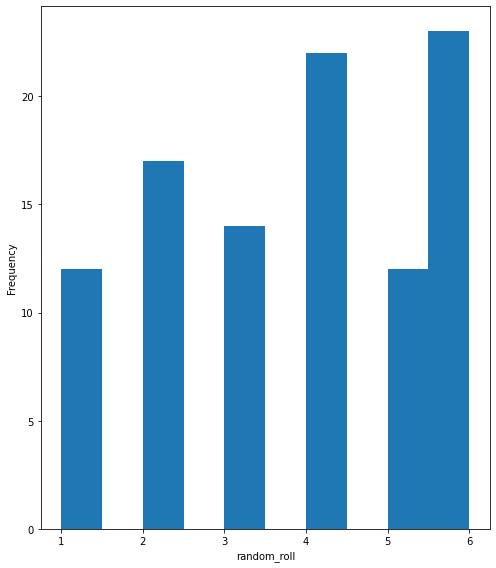

In [43]:
# your code here
data2 = dice_sort['value']
ax = data2.plot.hist(figsize=(7, 8))
ax.set_xlabel('random_roll')
plt.tight_layout()
plt.show()

In [ ]:
# Los resultados tienden a homogeneizarse en su frecuencia.

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [44]:
# your code here
dice_t = pd.read_csv('../data/roll_the_dice_thousand.csv')
dice_t

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [45]:
dice_t_sort = dice_t.sort_values('value')

In [46]:
calc_main(dice_t_sort['value'])

3.447

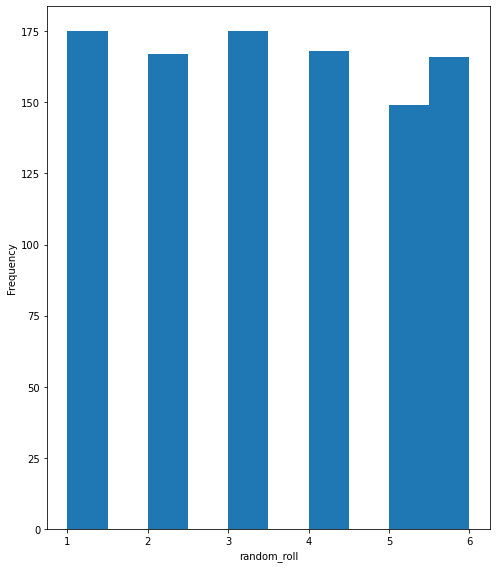

In [47]:
data3 = dice_t_sort['value']
ax = data3.plot.hist(figsize=(7, 8))
ax.set_xlabel('random_roll')
plt.tight_layout()
plt.show()

In [ ]:
# Se cumple lo mencionado anteriormente, donde a mayor número de tiradas las frecuencias se irán mogeneizando debido a la misma
# probabilidad de cada suceso.

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [48]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
type(ages)

pandas.core.frame.DataFrame

In [50]:
freq_ages = ages.value_counts(sort=False)
freq_ages

observation
1.0            2
2.0            2
4.0            1
5.0            2
6.0            2
              ..
69.0           1
70.0           1
71.0           1
73.0           1
82.0           1
Length: 72, dtype: int64

<AxesSubplot:xlabel='observation'>

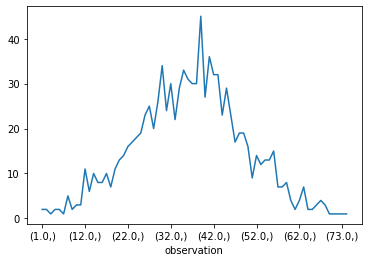

In [51]:
freq_ages.plot()

In [ ]:
# Mirando únicamente el gráfico, se podría intuir que respeta una distribución normal. La media se encontraría entre 32 y 42.
# Por lo tanto el 95% de los datos se encontraría a +- 2 veces la desviación stándard respecto a la media.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [49]:
ages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
your comments here
"""
# Se podría decir que se cumple lo antes mencionado.

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [53]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
type(ages2)

pandas.core.frame.DataFrame

In [54]:
freq_ages2 = ages2.value_counts(sort=False)
freq_ages2

observation
19.0             3
20.0            13
21.0            17
22.0            35
23.0            41
24.0            78
25.0            98
26.0           120
27.0           125
28.0           139
29.0           115
30.0            90
31.0            61
32.0            31
33.0            22
34.0             7
35.0             3
36.0             2
dtype: int64

<AxesSubplot:xlabel='observation'>

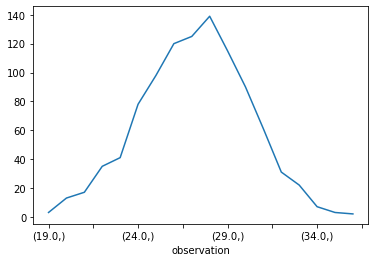

In [55]:
freq_ages2.plot()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""
# La figura podría interpretarse como similar pero está claro que en el segundo ejemplo los datos están más concentrados.

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [56]:
# your code here
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""
# Las medias difieren siendo en el caso 1 de 36.56 y caso 2 de 27.15 por lo que la población de media es más joven en el caso 2.
# En cuando a las desviaciones, teníamos en el caso 1 12.81 y en el caso 2 2.96 lo que nos muestra una mayor concentración
# de la distribución respecto a su media en el caso 2. Hay menos dispersión.

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [57]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
type(ages3)

pandas.core.frame.DataFrame

In [58]:
freq_ages3 = ages3.value_counts(sort=False)
freq_ages3

observation
1.0            1
2.0            2
4.0            2
5.0            1
7.0            1
              ..
73.0           6
74.0           6
75.0           2
76.0           1
77.0           2
Length: 75, dtype: int64

<AxesSubplot:xlabel='observation'>

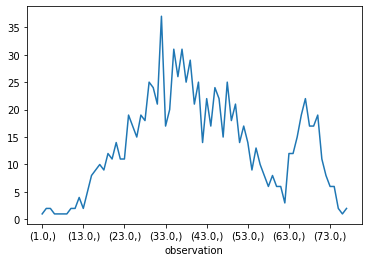

In [60]:
freq_ages3.plot()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [61]:
# your code here
ages3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
your comments here
"""
# Podemos observar que tanto la media como la desviación se han visto muy afectadas por lo que podrían considerarse outliers.

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [65]:
# your code here
ages3['observation'].quantile([.25, .5, .75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [90]:
quantiles(ages3['observation'])

'Q1=30.0, Q2=40.0, Q3=53.0'

In [ ]:
"""
your comments here
"""
# Observamos gracias a los quartiles que más del 50% de la muestra se encuentra por debajo de la edad de 40, cuando veíamos que
# la media se establecía en 41,98. Lo que confirma el peso relevante de los outliers para desplazar a la media a la derecha.

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [93]:
# your code here
ages3['observation'].quantile([.2, .3, .4, .5, .6, .7, .8, .9])

0.2    28.0
0.3    32.0
0.4    36.0
0.5    40.0
0.6    45.0
0.7    50.0
0.8    57.0
0.9    67.0
Name: observation, dtype: float64

In [ ]:
"""
your comments here
"""
# La distancia entre los valores de los percentiles del principio se observa que es mucho menor (4, 4, 4, 5, 5) a los del final
# donde hay mayor amplitud de valores (7, 10)

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""